In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Defining our set of pre-defined parameters

In [2]:
N = int(input("Total Population: "))
I_0 = int(input("Total Number of Infected at time = 0: "))
R_0 = int(input("Total Number of Recovered at time = 0: "))
S_0 = N - I_0 - R_0 #S_0 is starting susceptible
alpha = float(input("Chance of Infection: "))
beta = float(input("Fraction of People who recover per day: "))
MaxTime = int(input("Time for which the model should run: "))
RunTime = np.linspace(0, MaxTime, MaxTime)


# Parameters values inserted
# N = 500000
# I_0 = 1
# R_0 = 0
# alpha = 0.08
# beta = 0.03
# MaxTime = 1000

Total Population: 500000
Total Number of Infected at time = 0: 1
Total Number of Recovered at time = 0: 0
Chance of Infection: 0.08
Fraction of People who recover per day: 0.03
Time for which the model should run: 1000


### Making the system of  ODE function ( S, I and R with respect to time)

In [8]:
def Find_Deriv(y, RunTime, N, alpha, beta):
    S, I, R = y
    dsdt = -alpha * S * I/N
    didt = (alpha * S * I/N) - (beta * I)
    drdt = beta * I
    return dsdt, didt, drdt

y_0 = S_0, I_0, R_0
# odeint integrates the function 'Find_Deriv' with respect to our RunTime and parameters.
coord = odeint(Find_Deriv, y_0, RunTime, args = (N, alpha, beta))
S, I, R = coord.T


### Below block of code have the values of S, I,R in an array of 1000 instances since we have taken our `MaxTime=1000`

In [14]:
#S

In [13]:
#I

In [12]:
#R

### Plotting our results with the given hyperparameters

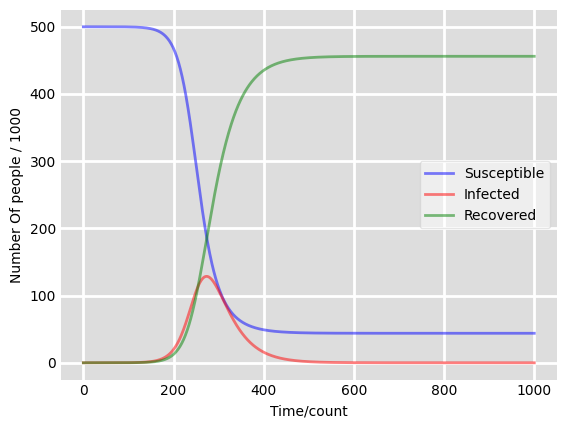

In [7]:
fig = plt.figure(facecolor ='w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
ax.plot(RunTime, S/1000, 'b', alpha = 0.5, lw = 2, label = "Susceptible")
ax.plot(RunTime, I/1000, 'r', alpha = 0.5, lw = 2, label = "Infected")
ax.plot(RunTime, R/1000, 'g', alpha = 0.5, lw = 2, label = "Recovered")
ax.set_xlabel('Time/count')
ax.set_ylabel('Number Of people / 1000')
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid( which = 'major', c= 'w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for x in ('top', 'right', 'bottom', 'left'):
    ax.spines[x].set_visible(False)
plt.show()